# Understanding of Word Embeddings: From Count Vectors to Word2Vec

### Giới thiệu
Trước khi bắt đầu, hãy xem các ví dụ bên dưới.

1. Bạn mở Google và tìm kiếm bài viết về giải vô địch Champions đang diễn ra và nhận được hàng trăm kết quả tìm kiếm về chủ đề đó.
2. Nate Silver đã phân tích hàng triệu dòng tweet và dự đoán chính xác kết quả của 49 trong số 50 tiểu bang trong cuộc bầu cử Tổng thống Hoa Kỳ năm 2008.
3. Bạn nhập một câu vào Google Dịch bằng tiếng Anh và sẽ nhận được bản chuyển đổi tương đương sang tiếng Trung.

Vậy những ví dụ trên có điểm gì chung?

Bạn có thể đoán đúng rồi – Xử lý VĂN BẢN . Cả ba kịch bản trên đều xử lý một lượng lớn văn bản để thực hiện nhiều nhiệm vụ khác nhau như phân cụm trong ví dụ tìm kiếm của Google, phân loại trong ví dụ thứ hai và Dịch máy trong ví dụ thứ ba.

Con người có thể xử lý định dạng văn bản khá trực quan nhưng nếu chúng ta có hàng triệu tài liệu được tạo ra trong một ngày, chúng ta không thể để con người thực hiện ba nhiệm vụ trên. Nó không có khả năng mở rộng cũng như không hiệu quả.

Vậy, làm thế nào để chúng ta có thể khiến máy tính ngày nay thực hiện việc phân cụm, phân loại, v.v. trên dữ liệu văn bản vì chúng ta biết rằng chúng thường không hiệu quả trong việc xử lý chuỗi hoặc văn bản để đưa ra bất kỳ đầu ra có ích nào?

Chắc chắn, máy tính có thể khớp hai chuỗi và cho bạn biết chúng có giống nhau hay không. Nhưng làm sao chúng ta có thể khiến máy tính cho bạn biết về bóng đá hoặc Ronaldo khi bạn tìm kiếm Messi? Làm sao bạn có thể khiến máy tính hiểu rằng "Apple" trong "Apple is a tasty fruit" là một loại trái cây có thể ăn được chứ không phải là một công ty?

Câu trả lời cho những câu hỏi trên nằm ở việc tạo ra một cách biểu diễn từ ngữ sao cho nắm bắt được ý nghĩa , mối quan hệ ngữ nghĩa và các loại bối cảnh khác nhau mà chúng được sử dụng.

Và tất cả những điều này đều được thực hiện bằng cách sử dụng Word Embeddings hoặc biểu diễn số của văn bản để máy tính có thể xử lý chúng.

Dưới đây, chúng ta sẽ xem xét chính thức Word Embeddings là gì và các loại khác nhau của chúng cũng như cách chúng ta có thể triển khai chúng để thực hiện các nhiệm vụ như trả về kết quả tìm kiếm hiệu quả trên Google.

## Nhúng từ là gì?
Nói một cách đơn giản, Word Embeddings là các văn bản được chuyển đổi thành số và có thể có nhiều cách biểu diễn số khác nhau của cùng một văn bản. Nhưng trước khi đi sâu vào chi tiết về Word Embeddings, chúng ta cần đặt câu hỏi sau – Tại sao chúng ta cần Word Embeddings?

Thực tế là, nhiều thuật toán Học máy và hầu hết các Kiến trúc Học sâu đều không có khả năng xử lý chuỗi  hoặc văn bản thuần túy  ở dạng thô. Chúng yêu cầu các con số làm đầu vào để thực hiện bất kỳ loại công việc nào, có thể là phân loại, hồi quy, v.v. theo nghĩa rộng. Và với lượng dữ liệu khổng lồ có trong định dạng văn bản, việc trích xuất kiến ​​thức từ đó và xây dựng các ứng dụng là điều bắt buộc. Một số ứng dụng thực tế của các ứng dụng văn bản là – phân tích tình cảm của các bài đánh giá của Amazon, v.v., phân loại hoặc nhóm tài liệu hoặc tin tức của Google, v.v.

Bây giờ chúng ta hãy định nghĩa chính thức về Word Embedding. Định dạng Word Embedding thường cố gắng ánh xạ một từ bằng từ điển thành một vectơ. Chúng ta hãy chia nhỏ câu này thành các chi tiết nhỏ hơn để có cái nhìn rõ ràng.

Take a look at this example – sentence=” Word Embeddings are Word converted into numbers “

A word in this sentence may be “Embeddings” or “numbers ” etc.

A dictionary may be the list of all unique words in the sentence. So, a dictionary may look like – [‘Word’,’Embeddings’,’are’,’Converted’,’into’,’numbers’]

Biểu diễn vectơ của một từ có thể là vectơ được mã hóa một nóng trong đó 1 biểu diễn cho vị trí mà từ đó tồn tại và 0 ở mọi nơi khác. Biểu diễn vectơ của "số"  theo định dạng này theo từ điển trên là [0,0,0,0,0,1] và của chuyển đổi là [0,0,0,1,0,0].

Đây chỉ là một phương pháp rất đơn giản để biểu diễn một từ dưới dạng vector. Chúng ta hãy xem xét các loại Word Embeddings hoặc Word Vectors khác nhau và ưu điểm cũng như nhược điểm của chúng so với các loại còn lại.

# Different Types of Word Embeddings
The different types of word embeddings can be broadly classified into two categories-

1. Frequency-based Embedding
2. Prediction-based Embedding 

Vì đã học nhiều về frequency-based embedding rồi nên sẽ qua luôn prediction-based embedding

### Phương pháp dựa trên tần suất (Frequency-based)
Những phương pháp này sử dụng thông tin tần suất của từ trong văn bản để tạo ra các vector biểu diễn từ. Một số phương pháp phổ biến bao gồm:

1. **Bag of Words (BoW)**
   - Biểu diễn văn bản dưới dạng vector số đếm tần suất của mỗi từ trong từ vựng.
   - Đơn giản nhưng không giữ được thông tin ngữ cảnh và thứ tự từ.

2. **TF-IDF (Term Frequency-Inverse Document Frequency)**
   - Biểu diễn văn bản dưới dạng vector mà mỗi từ có trọng số dựa trên tần suất xuất hiện của nó trong văn bản (TF) và sự phổ biến của nó trong tập văn bản (IDF).
   - Giúp giảm bớt ảnh hưởng của các từ phổ biến nhưng ít giá trị ngữ nghĩa.

3. **One-Hot Encoding**
   - Biểu diễn mỗi từ bằng một vector nhị phân với một giá trị 1 tại vị trí của từ trong từ vựng và 0 ở các vị trí khác.
   - Rất thưa thớt và không giữ được thông tin ngữ cảnh.

4. **Co-occurrence Matrix**
   - Xây dựng ma trận đồng xuất hiện dựa trên tần suất các từ xuất hiện cùng nhau trong cửa sổ ngữ cảnh cố định.
   - Giúp nắm bắt một số thông tin ngữ cảnh nhưng ma trận thường rất lớn và thưa thớt.

### Phương pháp dựa trên dự đoán (Prediction-based)
Những phương pháp này sử dụng mô hình học máy để học biểu diễn từ thông qua việc dự đoán ngữ cảnh của từ hoặc từ trong ngữ cảnh. Một số phương pháp phổ biến bao gồm:

1. **Word2Vec**
   - Bao gồm hai mô hình chính: Skip-Gram và Continuous Bag of Words (CBOW).
   - Skip-Gram: Dự đoán ngữ cảnh dựa trên từ trung tâm.
   - CBOW: Dự đoán từ trung tâm dựa trên ngữ cảnh.
   - Học biểu diễn từ theo cách mà từ có ngữ nghĩa tương tự sẽ có vector gần nhau trong không gian vector.

2. **GloVe (Global Vectors for Word Representation)**
   - Kết hợp thông tin tần suất và ngữ cảnh.
   - Học biểu diễn từ dựa trên ma trận đồng xuất hiện và tối ưu hóa để từ có ngữ nghĩa tương tự có vector gần nhau.

3. **FastText**
   - Mở rộng từ Word2Vec bằng cách xem mỗi từ như là tập hợp của các n-gram ký tự.
   - Giúp học được biểu diễn tốt hơn cho các từ hiếm và từ chưa từng gặp.

4. **ELMo (Embeddings from Language Models)**
   - Sử dụng mạng neural bidirectional LSTM để học biểu diễn từ phụ thuộc vào ngữ cảnh trong câu.
   - Vector biểu diễn từ thay đổi tùy thuộc vào ngữ cảnh của từ trong câu.

5. **BERT (Bidirectional Encoder Representations from Transformers)**
   - Sử dụng mô hình transformer để học biểu diễn từ theo cách bidirectional (cả trái và phải ngữ cảnh).
   - Học biểu diễn từ sâu sắc và ngữ cảnh hóa tốt hơn so với các phương pháp truyền thống.

### Kết luận
Cả hai phương pháp dựa trên tần suất và dựa trên dự đoán đều có ưu và nhược điểm riêng. Phương pháp dựa trên dự đoán hiện đang được ưa chuộng hơn trong NLP hiện đại do khả năng nắm bắt thông tin ngữ cảnh và ngữ nghĩa tốt hơn. Tuy nhiên, các phương pháp dựa trên tần suất vẫn hữu ích trong nhiều ứng dụng đơn giản và khi tài nguyên tính toán bị giới hạn.



## Prediction-based embedding

Word2vec không phải là một thuật toán đơn lẻ mà là bao gồm của hai kỹ thuật – CBOW (Continuous bag of words) và mô hình Skip-gram. Cả hai đều là mạng nơ-ron nông ánh xạ từ(các từ) đến biến mục tiêu cũng là một từ(các từ). Cả hai kỹ thuật này đều học các trọng số hoạt động như biểu diễn vectơ từ. Chúng ta hãy thảo luận riêng về cả hai phương pháp này và tìm hiểu trực giác về cách thức hoạt động của chúng.

Có hai cách khác nhau xây dựng mô hình word2vec:

- Skip-gram: Dự đoán những từ ngữ cảnh nếu biết trước từ đích.

- CBOW (Continuous Bag of Words): Dựa vào những từ ngữ cảnh để dự đoán từ đích.

Mỗi cách có những ưu nhược điểm khác nhau và áp dụng với những loại dữ liệu khác nhau.

## CBOW hoạt động như thế nào ?

Kiến trúc CBOW bao gồm một mô hình phân loại học sâu trong đó chúng ta lấy các từ ngữ cảnh làm đầu vào, X, và cố gắng dự đoán từ mục tiêu, Y.

Ví dụ, nếu chúng ta xem xét câu – “Word2Vec có một mô hình học sâu hoạt động ở phía sau.”, có thể có các cặp từ ngữ cảnh và từ mục tiêu (trung tâm). Nếu chúng ta xem xét kích thước cửa sổ ngữ cảnh là 2, chúng ta sẽ có các cặp như ([deep, model], learning), ([model, in], working), ([a, learning), deep) v.v. Mô hình học sâu sẽ cố gắng dự đoán các từ mục tiêu này dựa trên các từ ngữ cảnh.

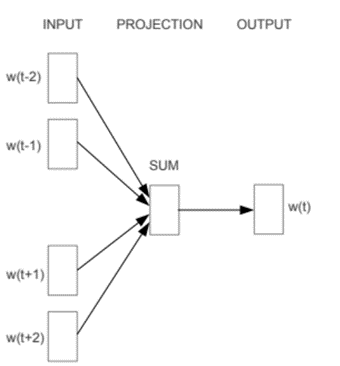

Các bước sau đây mô tả cách thức hoạt động của mô hình:

- Các từ ngữ cảnh đầu tiên được truyền vào lớp nhúng (khởi tạo với một số trọng số ngẫu nhiên) như thể hiện trong Hình bên dưới.
- Sau đó, các từ nhúng được chuyển đến lớp lambda, tại đó chúng tôi tính trung bình các từ nhúng.
- Sau đó, chúng tôi chuyển các nhúng này đến một lớp SoftMax dày đặc dự đoán từ mục tiêu của chúng tôi. Chúng tôi khớp nó với từ mục tiêu của chúng tôi và tính toán mất mát, sau đó chúng tôi thực hiện truyền ngược với mỗi kỷ nguyên để cập nhật lớp nhúng trong quá trình này.

Chúng ta có thể trích xuất các nhúng từ cần thiết từ lớp nhúng của mình sau khi quá trình đào tạo hoàn tất.

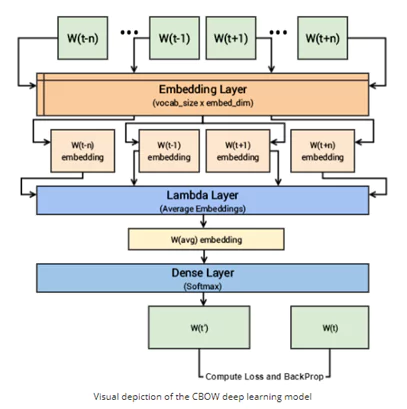

### Cách hoạt động của CBOW

1. **Đầu vào**: Các từ ngữ cảnh xung quanh từ đích.
2. **Đầu ra**: Từ đích.

### Các bước chi tiết:

#### 1. Chuẩn bị dữ liệu
Giả sử câu là "The quick brown fox jumps over the lazy dog". Chúng ta chọn "jumps" là từ đích, và ngữ cảnh là các từ xung quanh nó. Nếu cửa sổ ngữ cảnh là 2, các từ ngữ cảnh sẽ là ["quick", "brown", "fox", "over"].

#### 2. Vector one-hot
Mỗi từ ngữ cảnh được ánh xạ thành một vector one-hot. Giả sử từ vựng (vocabulary) gồm các từ ["the", "quick", "brown", "fox", "jumps", "over", "lazy", "dog"]:

- "the" = [1, 0, 0, 0, 0, 0, 0, 0]
- "quick" = [0, 1, 0, 0, 0, 0, 0, 0]
- "brown" = [0, 0, 1, 0, 0, 0, 0, 0]
- "fox" = [0, 0, 0, 1, 0, 0, 0, 0]
- "jumps" = [0, 0, 0, 0, 1, 0, 0, 0]
- "over" = [0, 0, 0, 0, 0, 1, 0, 0]
- "lazy" = [0, 0, 0, 0, 0, 0, 1, 0]
- "dog" = [0, 0, 0, 0, 0, 0, 0, 1]

#### 3. Embedding layer
Các vector one-hot được đưa qua lớp nhúng (embedding layer) để chuyển thành các vector nhúng (embedding vectors), kích thước nhúng là `N`.

Giả sử kích thước nhúng là 5:
- "quick" = [0.1, 0.3, 0.4, 0.2, 0.5]
- "brown" = [0.3, 0.7, 0.1, 0.6, 0.4]
- "fox" = [0.2, 0.4, 0.5, 0.7, 0.1]
- "over" = [0.6, 0.3, 0.8, 0.2, 0.9]

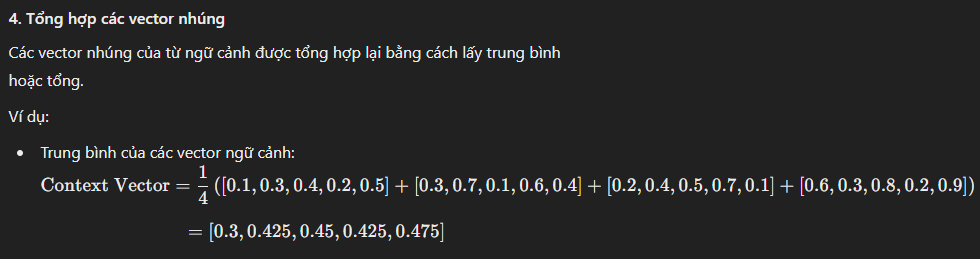

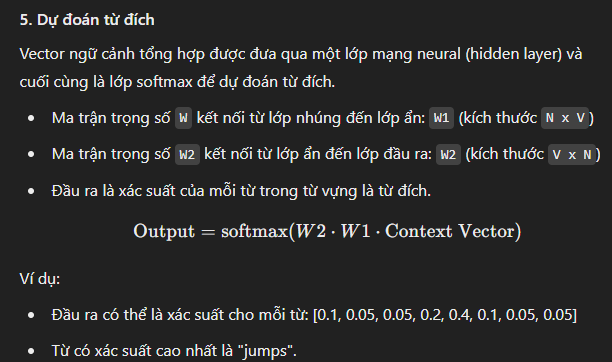

### Kết luận
Mô hình CBOW dự đoán từ đích dựa trên các từ ngữ cảnh xung quanh. Nó làm điều này bằng cách tổng hợp các vector nhúng của từ ngữ cảnh và sử dụng mạng neural để dự đoán từ đích. CBOW hiệu quả trong việc học các biểu diễn từ ngữ cho các từ thông dụng và phù hợp với các tập dữ liệu lớn.

### Giải thích kĩ phần tính toán dự đoán từ đích

### Đầu Ra Xác Suất và Các Ký Hiệu N và V

#### Đầu Ra Xác Suất
Trong mô hình CBOW, đầu ra là xác suất của mỗi từ trong từ vựng (vocabulary) có khả năng là từ đích (target word). Đầu ra này được tính toán bằng cách sử dụng hàm softmax để biến đổi điểm số của các từ thành xác suất.

#### Các Ký Hiệu:
- \( N \): Kích thước nhúng (embedding size), tức là số chiều của vector nhúng.
- \( V \): Kích thước từ vựng (vocabulary size), tức là tổng số từ trong từ vựng.

### Các Bước Chi Tiết

#### 1. Đầu Vào
Giả sử chúng ta có câu sau và muốn dự đoán từ đích "jumps" với các từ ngữ cảnh ["quick", "brown", "fox", "over"]:

#### 2. Chuyển Đổi Các Từ Ngữ Cảnh Thành Vector Nhúng
Mỗi từ ngữ cảnh được chuyển thành vector nhúng kích thước \( N \). Giả sử \( N = 5 \).

Ví dụ vector nhúng của các từ ngữ cảnh:
- "quick": \([0.1, 0.3, 0.4, 0.2, 0.5]\)
- "brown": \([0.3, 0.7, 0.1, 0.6, 0.4]\)
- "fox": \([0.2, 0.4, 0.5, 0.7, 0.1]\)
- "over": \([0.6, 0.3, 0.8, 0.2, 0.9]\)

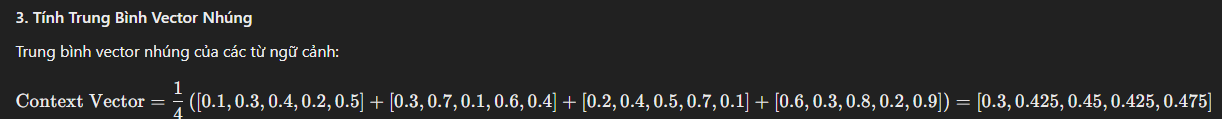

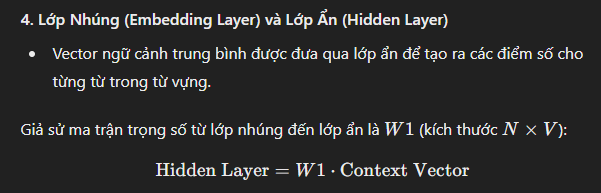

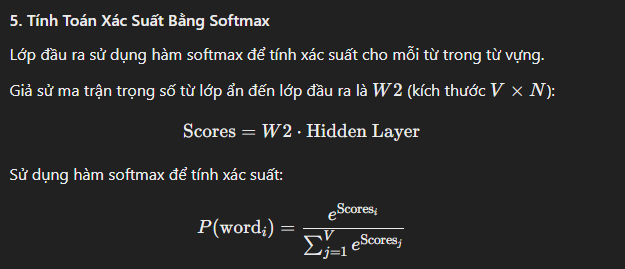

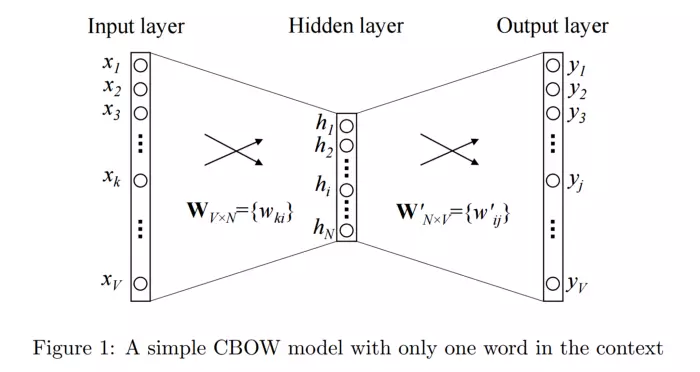
#### Tổng Kết Quy Trình:
1. **Đầu vào**: Các từ ngữ cảnh.
2. **Chuyển đổi**: Các từ ngữ cảnh thành các vector nhúng.
3. **Tính trung bình**: Các vector nhúng để tạo thành vector ngữ cảnh trung bình.
4. **Tính điểm số**: Sử dụng ma trận trọng số \( W1 \) và \( W2 \).
5. **Xác suất**: Dùng hàm softmax để tính xác suất cho mỗi từ trong từ vựng.

### Kết Luận
- \( N \) là kích thước nhúng (embedding size) và được quyết định trước khi huấn luyện.
- \( V \) là kích thước từ vựng (vocabulary size) và là tổng số từ trong từ vựng.
- Đầu ra là xác suất của mỗi từ trong từ vựng có khả năng là từ đích, được tính toán bằng cách sử dụng hàm softmax trên các điểm số từ lớp đầu ra.

## Skip-gram hoạt động như thế nào

Vì mô hình skip-gram phải dự đoán nhiều từ từ một từ duy nhất, chúng tôi đưa vào mô hình các cặp (X, Y) trong đó X là đầu vào của chúng tôi và Y là nhãn của chúng tôi. Điều này được thực hiện bằng cách tạo các mẫu đầu vào tích cực và các mẫu đầu vào tiêu cực.

Các mẫu đầu vào tích cực sẽ có dữ liệu đào tạo theo dạng này: [(mục tiêu, ngữ cảnh), 1] trong đó mục tiêu là từ mục tiêu hoặc từ trung tâm, ngữ cảnh biểu diễn các từ ngữ cảnh xung quanh và nhãn 1 cho biết liệu đó có phải là một cặp liên quan hay không. Các mẫu đầu vào tiêu cực sẽ có dữ liệu đào tạo theo cùng dạng này: [(mục tiêu, ngẫu nhiên), 0]. Trong trường hợp này, thay vì các từ xung quanh thực tế, các từ được chọn ngẫu nhiên sẽ được đưa vào cùng với các từ mục tiêu với nhãn 0 cho biết đó là một cặp không liên quan.

Các mẫu này giúp mô hình nhận biết các từ có liên quan đến ngữ cảnh và do đó tạo ra các nhúng tương tự cho các từ có nghĩa tương tự.

Các bước sau đây mô tả cách thức hoạt động của mô hình:

- Cả cặp từ mục tiêu và từ ngữ cảnh đều được chuyển đến các lớp nhúng riêng lẻ, từ đó chúng ta có được các nhúng từ dày đặc cho mỗi từ trong hai từ này.
- Sau đó, chúng tôi sử dụng 'lớp hợp nhất' để tính tích vô hướng của hai phép nhúng này và lấy giá trị tích vô hướng.
- Giá trị tích vô hướng này sau đó được gửi đến lớp sigmoid dày đặc, cho ra kết quả 0 hoặc 1.
- Đầu ra được so sánh với nhãn thực tế và tính toán mức mất mát, sau đó truyền ngược lại với mỗi kỷ nguyên để cập nhật lớp nhúng trong quá trình này.

Tương tự như CBOW, chúng ta có thể trích xuất các nhúng từ cần thiết từ lớp nhúng của mình sau khi quá trình đào tạo hoàn tất.

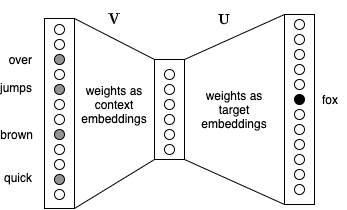